In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fruits = pd.read_table('fruit_data_with_colors.txt')
feature_name_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_name_fruits]
y_fruits = fruits['fruit_label']

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train_scaled, y_train)))
      
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', target_names_fruits[knn.predict(example_fruit_scaled)[0] - 1])

      

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


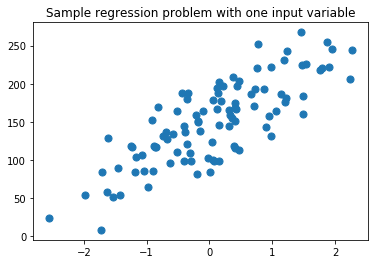

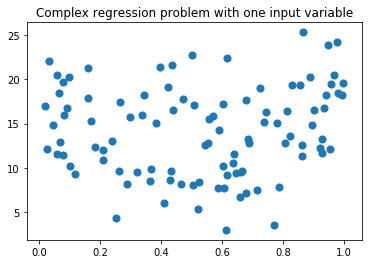

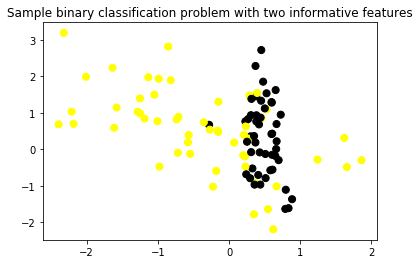

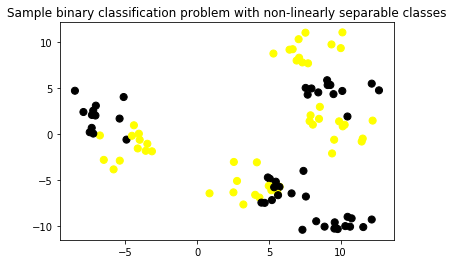

In [2]:
from sklearn.datasets import make_blobs, make_classification
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1,
                             n_informative=1, bias=150,
                             noise=30, random_state=0)
plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

# K-nearest Neighbors

## Classification

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

knn.fit(X_train, y_train)

print('knn Accuracy on train set {:.2f}'.format(knn.score(X_train, y_train)))
print('knn Accuracy on test set {:.2f}'.format(knn.score(X_test, y_test)))

knn Accuracy on train set 0.84
knn Accuracy on test set 0.76


## Regression

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

print(knn_reg.predict(X_test))
print('R-squared train score: {:.3f}'.
      format(knn_reg.score(X_train, y_train)))
print('R-squared test score: {:.3f}'.
      format(knn_reg.score(X_test, y_test)))
      

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared train score: 0.745
R-squared test score: 0.425


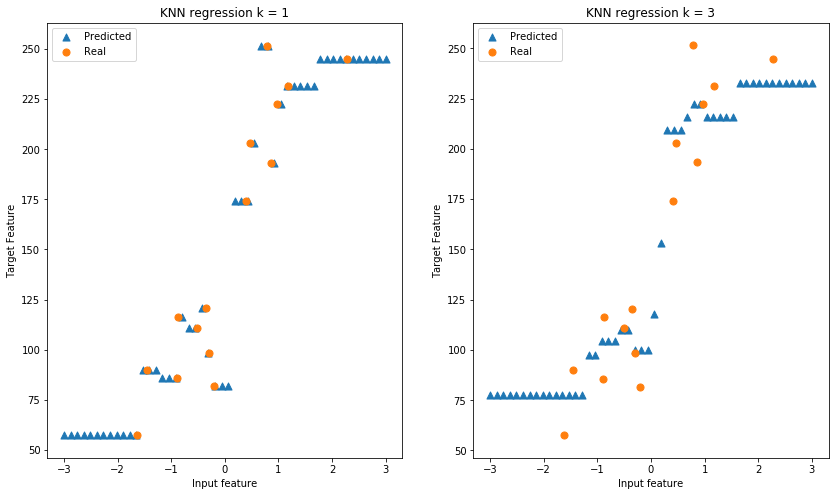

In [5]:
fig, subaxes = plt.subplots(1, 2, figsize=(14, 8))

X_predict_input = np.linspace(-3, 3, 50).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state=0)

for axes, k in zip(subaxes, [1, 3]):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_predicted_output = knn_reg.predict(X_predict_input)
    axes.scatter(X_predict_input, y_predicted_output, marker='^', label='Predicted', s=50)
    axes.scatter(X_train, y_train, marker='o', label='Real', s=50)
    axes.set_xlabel('Input feature')
    axes.set_ylabel('Target Feature')
    axes.set_title('KNN regression k = {}'.format(k))
    axes.legend()


### Regression modele complexity as a function of K

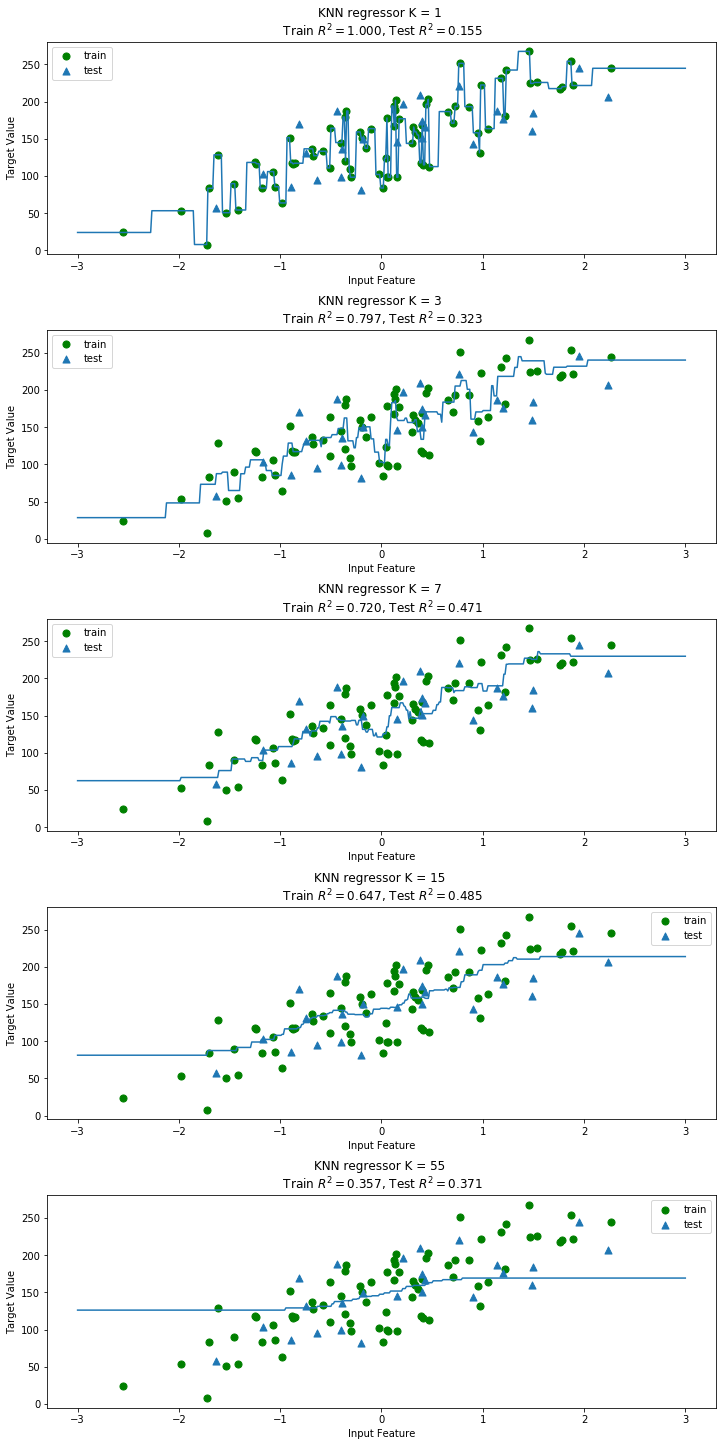

In [6]:
fig, subaxes = plt.subplots(5, 1, figsize=(10, 20))

X_predict_input = np.linspace(-3, 3, 500).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

for axes, k in zip(subaxes, [1, 3, 7, 15, 55]):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_predicted_output = knn_reg.predict(X_predict_input)
    axes.scatter(X_train, y_train, marker='o', s=50, label='train', c='green')
    axes.scatter(X_test, y_test, marker='^', s=50, label='test')
    axes.plot(X_predict_input, y_predicted_output)
    axes.set_title('KNN regressor K = {} \n Train $R^2 = {:.3f}$, Test $R^2 = {:.3f}$'.
                   format(k, knn_reg.score(X_train, y_train), knn_reg.score(X_test, y_test)))
    axes.set_xlabel('Input Feature')
    axes.set_ylabel('Target Value')
    axes.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# Linear model for regression

### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Linear model coefficient w = {:.2f}'.format(reg.coef_[0]))
print('Linear model intercept b = {:.2f}'.format(reg.intercept_))
print('R-squared error on training data = {:.2f}'.format(reg.score(X_train, y_train)))
print('R-squared error on test data = {:.2f}'.format(reg.score(X_test, y_test)))


Linear model coefficient w = 45.71
Linear model intercept b = 148.45
R-squared error on training data = 0.68
R-squared error on test data = 0.49


### Linear regression: example plot

Text(0,0.5,'Target value (y)')

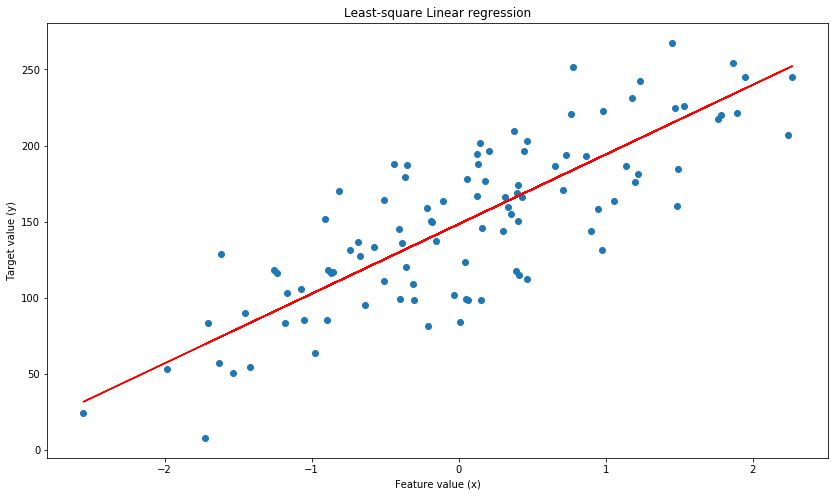

In [8]:
plt.figure(figsize=(14, 8))
plt.scatter(X_R1, y_R1)
plt.plot(X_R1, reg.coef_ * X_R1 + reg.intercept_, 'r-')
plt.title('Least-square Linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')

### Ridge regression

In [9]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0)

ridg_reg = Ridge(alpha=20.0)
ridg_reg.fit(X_train, y_train)

print('Ridge regression linear model intercept {:.2f}'.format(ridg_reg.intercept_))
print('Ridge regression linear model coefficient = {}'.format(ridg_reg.coef_))
print('R-squared error on training data  = {:.2f}'.format(ridg_reg.score(X_train, y_train)))
print('R-squared error on test data  = {:.2f}'.format(ridg_reg.score(X_test, y_test)))
print('Number of non-zero features {:.2f}'.format(np.sum(ridg_reg.coef_ != 0)))

Ridge regression linear model intercept 10.74
Ridge regression linear model coefficient = [ 1.44796975  1.56878535  0.47715237  2.91119643  1.30034341 -0.40549536
 -0.1698667 ]
R-squared error on training data  = 0.34
R-squared error on test data  = 0.31
Number of non-zero features 7.00


### Ridge regression with feature normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridg_reg = Ridge(alpha=20.0)
ridg_reg.fit(X_train_scaled, y_train)

print('Ridge regression linear model intercept = {:.2f}'.format(ridg_reg.intercept_))
print('Ridge regression linear model coefficient = {}'.format(ridg_reg.coef_))
print('R-squared error on training data = {:.2f}'.format(ridg_reg.score(X_train_scaled, y_train)))
print('R-squared error on test data = {:.2f}'.format(ridg_reg.score(X_test_scaled, y_test)))
print('Number of non-zero features = {:.2f}'.format(np.sum(ridg_reg.coef_ != 0)))

Ridge regression linear model intercept = 10.74
Ridge regression linear model coefficient = [ 1.4601041   1.57748055  0.48022902  2.92830886  1.32415873 -0.41357305
 -0.17076666]
R-squared error on training data = 0.35
R-squared error on test data = 0.32
Number of non-zero features = 7.00


### Ridge regression with regularization parameter: alpha

In [11]:
print('Ridge regression: effect of alpha regularization parameter')

for alpha in [0, 1, 5, 10, 15, 20, 30, 100, 1000]:
    ridg_reg = Ridge(alpha=alpha)
    ridg_reg.fit(X_train_scaled, y_train)
    training_r2 = ridg_reg.score(X_train_scaled, y_train)
    test_r2 = ridg_reg.score(X_test_scaled, y_test)
    print('''alpha = {:.2f}: \n
            \t R-squared training= {:.2f} \n
            \t R-squared test= {:.2f} \n'''.format(alpha, training_r2, test_r2))

Ridge regression: effect of alpha regularization parameter
alpha = 0.00: 

            	 R-squared training= 0.72 

            	 R-squared test= 0.72 

alpha = 1.00: 

            	 R-squared training= 0.71 

            	 R-squared test= 0.72 

alpha = 5.00: 

            	 R-squared training= 0.61 

            	 R-squared test= 0.61 

alpha = 10.00: 

            	 R-squared training= 0.49 

            	 R-squared test= 0.48 

alpha = 15.00: 

            	 R-squared training= 0.41 

            	 R-squared test= 0.38 

alpha = 20.00: 

            	 R-squared training= 0.35 

            	 R-squared test= 0.32 

alpha = 30.00: 

            	 R-squared training= 0.27 

            	 R-squared test= 0.23 

alpha = 100.00: 

            	 R-squared training= 0.10 

            	 R-squared test= 0.07 

alpha = 1000.00: 

            	 R-squared training= 0.01 

            	 R-squared test= -0.02 



### Lasso regression

In [12]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_lasso = Lasso(alpha=2, max_iter=10000)
lin_lasso.fit(X_train_scaled, y_train)

print('Crime Dataset')
print('lasso regression linear model intercept: {:.2f}'.format(lin_lasso.intercept_))
print('lasso regression linear model coefficient: {}'.format(lin_lasso.coef_))
print('R-squared error on training data {:.2f}'.format(lin_lasso.score(X_train_scaled, y_train)))
print('R-squared error on test data {:.2f}'.format(lin_lasso.score(X_test_scaled, y_test)))
print('Feature with non-zero weight')

for feature, weight in sorted(list(zip(list(X_crime), lin_lasso.coef_)), key= lambda e: -abs(e[1])):
    if weight != 0:
        print('\t{}, {:.3f}'.format(feature, abs(weight)))
    

Crime Dataset
lasso regression linear model intercept: 1186.61
lasso regression linear model coefficient: [    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826    -0. 

#### Lasso regression with regularization parameter: alpha

In [13]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 20]:
    lin_lass = Lasso(alpha=alpha, max_iter=10000)
    lin_lass.fit(X_train_scaled, y_train)
    r2_train = lin_lass.score(X_train_scaled, y_train)
    r2_test = lin_lass.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(lin_lass.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50



### Polynomial regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

poly = PolynomialFeatures(degree=2)

X_F1_poly = poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)

linreg = LinearRegression()
linreg.fit(X_F1_poly, y_F1)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linreg = Ridge(alpha=1)
linreg.fit(X_F1_poly, y_F1)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))



linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722
linear model coeff (w): [ 3.15449635e-15  1.90754857e+01  3.14255585e+01 -1.99814448e+01
  1.03186400e+01  5.63725785e+00  3.80588622e+00  2.17367568e+00
 -9.99486692e+00 -4.19281146e+00  1.73245032e+00 -2.47810704e-01
  1.07124254e+00 -1.32163793e+00 -2.02930463e+00 -1.76014543e+01
  2.48485950e+00 -3.23312335e+00 -3.18640726e+00 -6.57930480e-01
 -6.27863067e+00  1.70136924e+01 -1.62225932e+00  2.33521723e+00
 -1.83759254e+00  1.92396649e+00  1.17656707e+00  5.45844837e-01
  3.20435032e-01  1.12356732e+00  1.13830499e+00 -3.56755983e+00
 -1.75953239e+00 -4.55256577e-01  9.90174135e-01  4.94743136e-01]
linear model intercept (b): -4.904
R-squared score (training): 0.963
R-squared score (test): 0.966
linear model coeff (w): [ 0.          2.5355647   5.2704704  -4.06994287  3.752527

## Linear models for classification

### Logistic regression

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

/home/djaballah/PythonEnv/PFE/lib/python3.5/site-packages/ipykernel_launcher.py:20: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/home/djaballah/PythonEnv/PFE/lib/python3.5/site-packages/ipykernel_launcher.py:25: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


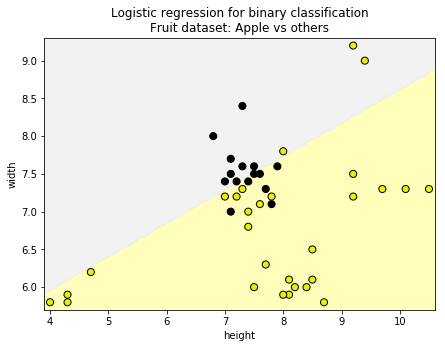

In [28]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_appl = y_fruits_2d == 1
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.as_matrix(),
                                                     y_fruits_appl.as_matrix(),
                                                     random_state=0)

clf = LogisticRegression(C=100)
clf.fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h, w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


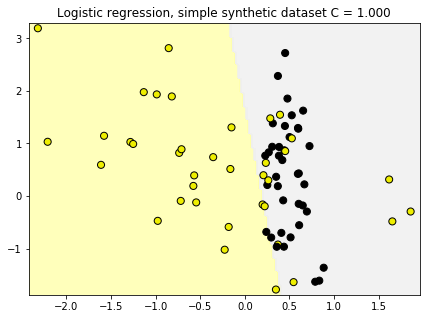

In [40]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

clf = LogisticRegression(C=2)
clf.fit(X_train, y_train)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))

#### Logistic regression regularization

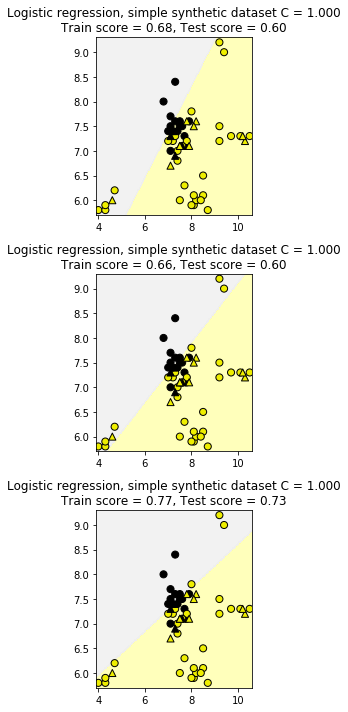

In [43]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_appl.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for c, ax in zip([1, 10, 100], subaxes):
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    acc_train = clf.score(X_train, y_train)
    acc_test = clf.score(X_test, y_test)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             ax)
plt.tight_layout()

#### Application to real dataset

In [54]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of logistic regression classifier on training data {:.3f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test data {:.3f}'.
     format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of logistic regression classifier on training data 0.960
Accuracy of logistic regression classifier on test data 0.958
